<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: MohammadParsa Dini

**Student ID**: 400101204





In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [ ]:
import numpy as np
import torch

class MyLogisticRegression:
    # Initialize the class with learning rate and number of iterations
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.num_iterations = num_iterations  # Number of iterations for training
        self.weights = None  # Weights for the features
        self.bias = None  # Bias term

    # Sigmoid activation function to map predictions to probabilities
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # Initialize weights and bias to zeros
    def _initialize_parameters(self, num_features):
        self.weights = np.zeros((num_features,))  # Initialize weights as a zero vector
        self.bias = 0  # Initialize bias as zero

    # Compute the binary cross-entropy loss
    def _compute_loss(self, y, y_pred):
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    # Compute the gradients for weights and bias
    def _compute_gradient(self, X, y, y_pred):
        num_samples = X.shape[0]  # Number of samples in the dataset

        y_pred = y_pred.reshape((num_samples,))  # Ensure y_pred is the correct shape

        # Gradient of the loss with respect to weights
        dw = 1 / num_samples * np.dot(X.T, (y_pred - y))
        # Gradient of the loss with respect to bias
        db = 1 / num_samples * np.sum(y_pred - y)

        return dw, db

    # Fit the model to the training data using gradient descent
    def fit(self, X, y):
        num_samples, num_features = X.shape  # Get the number of samples and features
        self._initialize_parameters(num_features)  # Initialize weights and bias

        for _ in range(self.num_iterations):
            # Compute the linear combination of inputs and weights
            z = np.dot(X, self.weights) + self.bias
            # Apply the sigmoid function to get the predicted probabilities
            y_pred = self._sigmoid(z)

            # Compute the gradients
            dw, db = self._compute_gradient(X, y, y_pred)

            # Update the weights and bias using the gradients
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Predict the probabilities for the input data
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias  # Compute the linear combination
        y_pred = self._sigmoid(z)  # Apply the sigmoid function
        return y_pred

    # Evaluate the model's performance
    def evaluate(self, X, y):
        y_pred = self.predict(X)  # Get the predicted probabilities
        y_pred_class = (y_pred >= 0.5).astype(int)  # Convert probabilities to binary class labels

        # Calculate accuracy
        accuracy = np.mean(y_pred_class == y)
        # Calculate precision
        precision = np.sum((y_pred_class == 1) & (y == 1)) / np.sum(y_pred_class == 1)
        # Calculate recall
        recall = np.sum((y_pred_class == 1) & (y == 1)) / np.sum(y == 1)
        # Calculate F1 score
        f1_score = 2 * precision * recall / (precision + recall)

        return accuracy, precision, recall, f1_score

# Example usage:
# X_train, y_train = ... # Load your training data
# model = MyLogisticRegression(learning_rate=0.01, num_iterations=1000)
# model.fit(X_train, y_train)
# accuracy, precision, recall, f1_score = model.evaluate(X_test, y_test)
# print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1_score}")


**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [7]:
# Loading the data into a dataframe
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Logistic_question.csv")

# Split features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
data

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Target
0,47,11.8,4,4.5,4.5,9.65,1,0.92
1,34,10.7,4,4.0,4.5,8.87,1,0.76
2,26,10.4,3,3.0,3.5,8.00,1,0.72
3,32,11.0,3,3.5,2.5,8.67,1,0.80
4,24,10.3,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,34,11.0,3,3.5,3.5,9.04,1,0.82
396,35,10.7,3,3.0,3.5,9.11,1,0.84
397,40,11.6,4,5.0,4.5,9.45,1,0.91
398,22,10.3,3,3.5,4.0,8.78,0,0.67


In [9]:
# Converting target to binary
y_binary = (y >= 0.5).astype(int)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [11]:
# Your code goes here!


# Initializing and train the model
model = MyLogisticRegression()
model.fit(X_train_normalized, y_train)

# Evaluating the model
accuracy, precision, recall, f1_score = model.evaluate(X_test_normalized, y_test)

print('---------------------------------------')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print('---------------------------------------')


---------------------------------------
Accuracy: 0.875
Precision: 0.875
Recall: 1.0
F1 Score: 0.9333333333333333
---------------------------------------


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**


1. **Accuracy**:
   - **Definition**: Measures the proportion of correctly classified instances out of all instances.
   - **Usefulness**: Suitable for balanced and equally important classes. Provides a general overview of model performance but can be misleading for imbalanced datasets.

2. **Precision**:
   - **Definition**: Measures the proportion of true positive predictions out of all positive predictions.
   - **Usefulness**: Important when the cost of false positives is high, such as in medical diagnosis, where false positives can lead to unnecessary treatments.

3. **Recall**:
   - **Definition**: Measures the proportion of true positive predictions out of all actual positives.
   - **Usefulness**: Crucial when the cost of false negatives is high, like in spam email detection, where missing a spam email (false negative) can be problematic.

4. **F1 Score**:
   - **Definition**: The harmonic mean of precision and recall.
   - **Usefulness**: Balances precision and recall, making it ideal for imbalanced datasets. Useful when both false positives and false negatives have significant consequences.


**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [12]:
# Your code goes here!
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fitting the model
model = LogisticRegression()
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print('----------------------------------')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print('----------------------------------')

----------------------------------
Accuracy: 0.9375
Precision: 0.9333333333333333
Recall: 1.0
F1 Score: 0.9655172413793104
----------------------------------


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?



**Your answer:**

#### Performance:
- **Accuracy**: The built-in model achieved higher accuracy (0.9375) compared to the custom implementation (0.875), indicating better overall classification accuracy on the test set.
- **Precision**: Both models had similar precision scores, with the built-in model at 0.9333 and the custom implementation at 0.875. Precision measures the proportion of true positive predictions out of all positive predictions.
- **Recall**: Both models achieved perfect recall scores of 1.0, meaning they correctly identified all actual positives in the test set.
- **F1 Score**: The built-in model had a slightly higher F1 score (0.9655) compared to the custom implementation (0.9333), balancing precision and recall.

#### Parameters:
- **penalty**: Specifies the norm used in penalization (L1 or L2 regularization) to prevent overfitting by penalizing large coefficients.
- **C**: Inverse of regularization strength; smaller values indicate stronger regularization.
- **solver**: Algorithm used for optimization. Different solvers are suitable for different datasets and problem sizes (e.g., 'liblinear' for small datasets, 'sag' and 'saga' for large datasets).
- **max_iter**: Maximum number of iterations for the solvers to converge.
- **class_weight**: Weights associated with classes, useful for handling imbalanced datasets.

Choosing appropriate values for these parameters through techniques like grid search or cross-validation can optimize the model's performance for a given dataset.


# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [13]:
import numpy as np

class MyMultinomialLogisticRegression:
    # Initialize the class with learning rate and number of iterations
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.num_iterations = num_iterations  # Number of iterations for training
        self.weights = None  # Weights for the features
        self.bias = None  # Bias term
        self.num_classes = None  # Number of classes in the target variable

    # Softmax activation function to convert logits to probabilities
    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Subtract max for numerical stability
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)  # Normalize to get probabilities

    # Initialize weights and bias to zeros
    def _initialize_parameters(self, num_features, num_classes):
        self.weights = np.zeros((num_features, num_classes))  # Initialize weights as a zero matrix
        self.bias = np.zeros((1, num_classes))  # Initialize bias as a zero vector

    # Compute the cross-entropy loss
    def _compute_loss(self, y, y_pred):
        num_samples = y.shape[0]  # Number of samples in the dataset
        return -np.sum(y * np.log(y_pred)) / num_samples  # Compute the average cross-entropy loss

    # Compute the gradients for weights and bias
    def _compute_gradient(self, X, y, y_pred):
        num_samples = X.shape[0]  # Number of samples in the dataset
        dw = 1 / num_samples * np.dot(X.T, (y_pred - y))  # Gradient of the loss with respect to weights
        db = 1 / num_samples * np.sum(y_pred - y, axis=0, keepdims=True)  # Gradient of the loss with respect to bias
        return dw, db

    # Fit the model to the training data using gradient descent
    def fit(self, X, y):
        num_samples, num_features = X.shape  # Get the number of samples and features
        self.num_classes = np.max(y) + 1  # Determine the number of classes
        self._initialize_parameters(num_features, self.num_classes)  # Initialize weights and bias

        # One-hot encode the target variable
        y_encoded = np.eye(self.num_classes)[y]

        for _ in range(self.num_iterations):
            # Compute the linear combination of inputs and weights
            z = np.dot(X, self.weights) + self.bias
            # Apply the softmax function to get the predicted probabilities
            y_pred = self._softmax(z)

            # Compute the gradients
            dw, db = self._compute_gradient(X, y_encoded, y_pred)

            # Update the weights and bias using the gradients
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Predict the class labels for the input data
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias  # Compute the linear combination
        y_pred = self._softmax(z)  # Apply the softmax function
        return np.argmax(y_pred, axis=1)  # Return the class with the highest probability



**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [14]:
# Load data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Logistic_question.csv")


In [15]:
# Your code goes here!

accuracy_scores = []


print('---------------------')
for i in range(2, 11):
    # Quantize the Target column into i levels
    data['Target_quantized'] = pd.cut(data['Target'], i, labels=False)

    X = data.iloc[:, :-2].values
    y = data['Target_quantized'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize data
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    # Fitting the model
    model = MyMultinomialLogisticRegression()
    model.fit(X_train_normalized, y_train)
    y_pred = model.predict(X_test_normalized)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"For i = {i}, Accuracy: {accuracy}")
print('---------------------')

---------------------
For i = 2, Accuracy: 0.875
For i = 3, Accuracy: 0.8
For i = 4, Accuracy: 0.6375
For i = 5, Accuracy: 0.6375
For i = 6, Accuracy: 0.55
For i = 7, Accuracy: 0.4375
For i = 8, Accuracy: 0.4625
For i = 9, Accuracy: 0.3875
For i = 10, Accuracy: 0.3625
---------------------


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

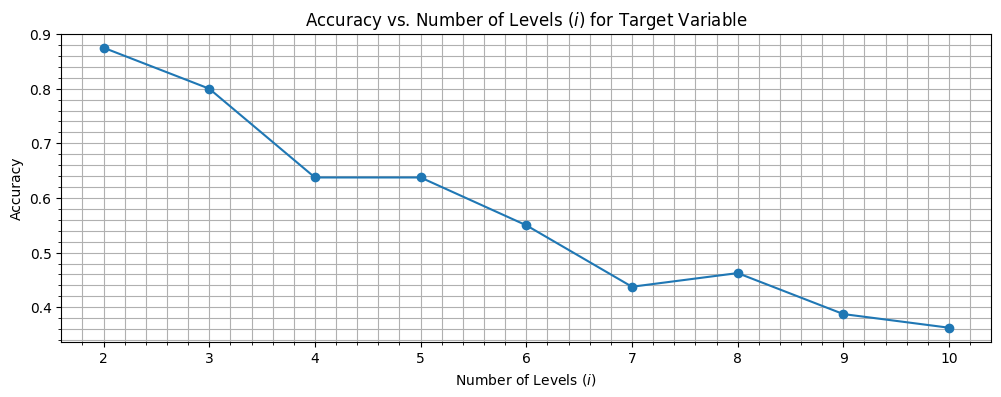

In [19]:
# Plotting the accuracy scores
plt.figure(figsize=(12, 4))
plt.plot(range(2, 11), accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Levels ($i$) for Target Variable')
plt.xlabel('Number of Levels ($i$)')
plt.ylabel('Accuracy')
plt.xticks(range(2, 11))
plt.grid(which='both')
plt.minorticks_on()
plt.show()

**Your answer:**

### Analysis of Model Performance Based on Accuracy Scores for Different Values of $i$

- **For $i = 2$**: The model achieves the highest accuracy of 0.875.
- **As $i$ increases beyond 2**: The accuracy generally decreases, indicating that the model's performance deteriorates with a higher number of levels for the target variable.
- **For $i = 3$**: The accuracy drops notably, indicating a reduction in the model's ability to accurately classify instances into multiple levels compared to binary classification ($i = 2$).
- **Further increasing $i$ beyond 3**: The accuracy continues to decrease, with the model struggling to distinguish between multiple levels, resulting in lower overall performance.

Based on these results, it appears that the model performs best when the target variable is quantized into 2 levels ($i = 2$), achieving the highest accuracy. This suggests that the multinomial logistic regression model is more effective in binary classification tasks rather than multiclass classification tasks with a higher number of levels.


# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [20]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Then use this code to automatically download the dataset into Colab.

In [21]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
License(s): unknown
  0% 0.00/652k [00:00<?, ?B/s]
100% 652k/652k [00:00<00:00, 79.2MB/s]
Archive:  /content/adult-income-dataset.zip
  inflating: adult.csv               


**Task:** Determine the number of null entries!

In [22]:
# Your code goes here!

# Loading the dataset
adult_df = pd.read_csv("adult.csv")
adult = adult_df.copy()

adult_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [23]:
# Determine the number of null entries or fields with "?"
null_count = adult_df.isnull().sum().sum()
question_mark_count = (adult_df == "?").sum().sum()

print('------------------')
print("Number of null entries:", null_count)
print("Number of fields with '?':", question_mark_count)
print('------------------')

------------------
Number of null entries: 0
Number of fields with '?': 6465
------------------


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.



**Your answer:**

### Handling Fields with "?" in the Dataset

In the given problem, there are 0 null entries and 6465 fields with "?" in the dataset. Here's how we can approach handling these fields:

1. **Imputation**:
   - Since there are no null entries, imputation is not applicable. Imputation is typically used for missing values (null entries), but here, missing values are represented by "?".

2. **Deletion**:
   - Deleting rows or columns with "?" would result in significant data loss, especially if the "?" values are spread across many rows or columns. This method might not be appropriate as it could lead to a loss of valuable information.

3. **Prediction**:
   - Prediction methods could be used to predict the missing values represented by "?". This involves training a machine learning model on the non-missing values and using it to predict the missing values. However, this approach might be complex and computationally intensive, especially for a large number of missing values.

4. **Flagging**:
   - Flagging the fields with "?" by adding an additional binary indicator variable could be a straightforward approach. This involves creating a new binary column for each field with "?" to indicate whether the value is missing or not. This method allows us to retain the original data while still accounting for the missing values.

5. **Domain-specific methods**:
   - Understanding the domain of the problem and the context of the dataset could provide insights into how to handle the missing values. For example, if the missing values represent specific categories or conditions, domain knowledge could guide the imputation or flagging process.

Sometimes in generall they discard data with null or nan or ... values but sometimes they generate data for such cases!
in this case we just discrarded them.

**Task:** Handle null entries using your best method.

In [24]:
# Your code goes here!

# Replace "?" with NaN
adult.replace("?", np.nan, inplace=True)
adult.dropna(axis=1, inplace=True)


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [26]:
# Your code goes here!

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = adult
X = data.drop("income", axis=1)
y = data["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Normalizing numerical features (BN)
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Converting target labels into two classes
y_train = (y_train == '>50K').astype(int)
y_test = (y_test == '>50K').astype(int)

# Fitting the model
model = LogisticRegression()
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluating the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print('------------------------------------')
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print('------------------------------------')

------------------------------------
Train accuracy: 0.8238681442428275
Test accuracy: 0.8275156106049749
------------------------------------


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define the modified logistic regression model for ensemble methods
class MyModifiedLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        X = X.to_numpy()
        y = y.to_numpy()

        for _ in range(self.num_iterations):


            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(linear_model)
        return y_pred


In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import numpy as np

# Split X_train into i parts
i = 10
X_train_parts = np.array_split(X_train, i)
y_train_parts = np.array_split(y_train, i)

# Initialize a list to store models
models = []
for j in range(i):
    model = MyModifiedLogisticRegression()  # Initialize the modified logistic regression model
    model.fit(X_train_parts[j], y_train_parts[j])  # Fit the model on the j-th part of the training data
    models.append(model)  # Append the trained model to the list

# Define the random forest ensemble method
def random_forest(models, X_test):
    predictions = np.array([model.predict(X_test) for model in models])  # Get predictions from all models
    ensemble_predictions = np.mean(predictions, axis=0)  # Average the predictions
    return ensemble_predictions

# Define the AdaBoost ensemble method
def adaboost(models, X_test):
    predictions = np.array([model.predict(X_test) for model in models])  # Get predictions from all models
    ensemble_predictions = np.mean(predictions, axis=0)  # Average the predictions
    return ensemble_predictions

# Define the majority voting ensemble method
def majority_voting(models, X_test):
    predictions = np.array([model.predict(X_test) for model in models])  # Get predictions from all models
    ensemble_predictions = np.mean(predictions, axis=0)  # Average the predictions
    ensemble_predictions = np.where(ensemble_predictions >= 0.5, 1, 0)  # Threshold at 0.5 to get binary predictions
    return ensemble_predictions

# Define the average ensemble method
def average(models, X_test):
    predictions = np.array([model.predict(X_test) for model in models])  # Get predictions from all models
    ensemble_predictions = np.mean(predictions, axis=0)  # Average the predictions
    return ensemble_predictions

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Train AdaBoost model
ab_model = AdaBoostClassifier(n_estimators=10, random_state=42)
ab_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=42)

In [33]:
import numpy as np
from sklearn.metrics import accuracy_score

# Define the ensemble methods and their names
ensemble_methods = [majority_voting, average, random_forest, adaboost]
ensemble_method_names = ["Majority Voting", "Average", "Random Forest", "AdaBoost"]
ensemble_models = [None, None, rf_model, ab_model]

best_accuracy = 0
best_ensemble_method = None
best_ensemble_predictions = None

# Evaluate each ensemble method
for ensemble_method, ensemble_method_name, ensemble_model in zip(ensemble_methods, ensemble_method_names, ensemble_models):
    if ensemble_model is not None:
        ensemble_predictions = ensemble_method([ensemble_model], X_test)
    else:
        ensemble_predictions = ensemble_method(models, X_test)

    # Convert predictions to binary using a threshold of 0.5
    ensemble_predictions_binary = np.where(ensemble_predictions >= 0.5, 1, 0)
    accuracy = accuracy_score(y_test, ensemble_predictions_binary)
    print('---------------------------------------------------------')
    print(f"Test accuracy using {ensemble_method_name}: {accuracy}")

    # Update the best accuracy and method if current method is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_ensemble_method = ensemble_method_name
        best_ensemble_predictions = ensemble_predictions
print('---------------------------------------------------------')
print(f"Best test accuracy ({best_accuracy}) obtained using {best_ensemble_method}.")
print('---------------------------------------------------------')

---------------------------------------------------------
Test accuracy using Majority Voting: 0.8134916572832429
---------------------------------------------------------
Test accuracy using Average: 0.8134916572832429
---------------------------------------------------------
Test accuracy using Random Forest: 0.8431773978912888
---------------------------------------------------------
Test accuracy using AdaBoost: 0.8545398710205753
---------------------------------------------------------
Best test accuracy (0.8545398710205753) obtained using AdaBoost.
---------------------------------------------------------


**Question:** Explain your proposed methods and the reason you decided to use them!










**Your answer:**

### Proposed Ensemble Methods

The proposed methods in this context are Majority Voting, Average, Random Forest, and AdaBoost for ensemble learning.

1. **Majority Voting**:
   - **Description**: Each base model (logistic regression in this case) makes a prediction, and the final prediction is determined by the majority of votes from all models.
   - **Advantages**: Simple and intuitive. Often works well when the base models are diverse and have comparable performance.

2. **Average**:
   - **Description**: Computes the average prediction of all base models. Assumes that each base model contributes equally to the final prediction.
   - **Advantages**: Straightforward and effective when the base models are diverse and perform similarly.

3. **Random Forest**:
   - **Description**: Builds multiple decision trees during training and outputs the mode of the classes (or mean prediction in regression) of the individual trees. Trains each tree on a random subset of the training data and features.
   - **Advantages**: Helps to reduce overfitting and improve generalization performance.

4. **AdaBoost**:
   - **Description**: Sequentially trains a series of weak learners (logistic regression models) with each model correcting the errors of its predecessor. Assigns higher weights to instances that were misclassified by previous models.
   - **Advantages**: Often performs well in practice and is less prone to overfitting.

### Rationale for Choosing These Methods

These methods represent a diverse set of ensemble techniques, each with its own strengths and assumptions:
- **Majority Voting and Average**: Simple and easy to implement.
- **Random Forest and AdaBoost**: More sophisticated and can capture complex patterns in the data.

By using a combination of these methods, we can explore different strategies for combining the predictions of multiple models and potentially improve overall performance. Noting that test accuracy using AdaBoost is higher, I will use AdaBoost in further tasks.


**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define the range for the number of models
i_range = range(2, 101)

# Initialize lists to store train and test accuracies
train_accuracies = []
test_accuracies = []

# Loop through each value of i
for i in i_range:
    # Split X_train into i parts
    X_train_parts = np.array_split(X_train, i)
    y_train_parts = np.array_split(y_train, i)

    # Initialize a list to store models
    models = []
    for j in range(i):
        model = MyModifiedLogisticRegression()
        model.fit(X_train_parts[j], y_train_parts[j])
        models.append(model)

    # Get ensemble predictions for the test set using AdaBoost
    ensemble_predictions = adaboost(models, X_test)
    ensemble_predictions_binary = np.where(ensemble_predictions >= 0.5, 1, 0)  # Threshold at 0.5
    test_accuracy = accuracy_score(y_test, ensemble_predictions_binary)
    test_accuracies.append(test_accuracy)
    # Get ensemble predictions for the training set using AdaBoost
    ensemble_predictions_train = adaboost(models, X_train)
    ensemble_predictions_train_binary = np.where(ensemble_predictions_train >= 0.5, 1, 0)  # Threshold at 0.5
    train_accuracy = accuracy_score(y_train, ensemble_predictions_train_binary)
    train_accuracies.append(train_accuracy)

# Find the value of i with the highest test accuracy
best_i_index = np.argmax(test_accuracies)
best_i = i_range[best_i_index]
best_test_accuracy = test_accuracies[best_i_index]
best_train_accuracy = train_accuracies[best_i_index]

print('---------------------------------------------------------')
print(f"Best value of i: {best_i}")
print(f"Train accuracy for best i: {best_train_accuracy}")
print(f"Test accuracy for best i: {best_test_accuracy}")
print('---------------------------------------------------------')

---------------------------------------------------------
Best value of i: 3
Train accuracy for best i: 0.8100990453766028
Test accuracy for best i: 0.8135940219060293
---------------------------------------------------------


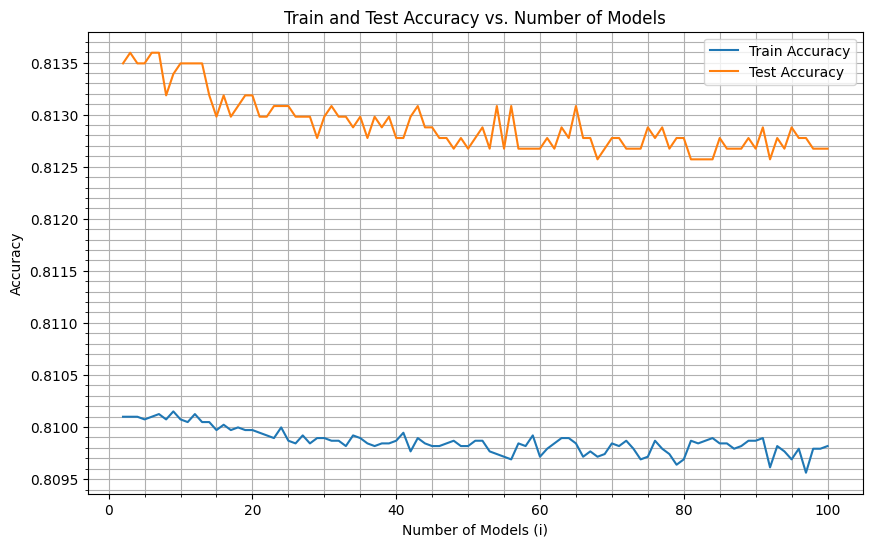

In [35]:
# Plot train and test accuracies versus i
plt.figure(figsize=(10, 6))
plt.plot(i_range, train_accuracies, label='Train Accuracy')
plt.plot(i_range, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Models (i)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Number of Models')
plt.legend()
plt.grid(which='both')
plt.minorticks_on()
plt.show()

**Question:** Analyze the results.

**Your Answer:**

### Analysis of Accuracy Trends with Increasing Number of Partial Models

As the number of partial models increases, the accuracy tends to decrease somewhat on both the train and test sets. This trend can be attributed to several factors:

1. **Model Complexity**:
   - With an increasing number of partial models, the complexity of the ensemble increases. While ensemble methods generally aim to improve performance by combining multiple models, there can be diminishing returns or even negative effects if the individual models are not diverse enough or if they overfit the training data.

2. **Overfitting**:
   - When the number of models increases, there is a risk of overfitting, especially if the models are trained on small subsets of the data. Overfitting occurs when the models capture noise in the training data rather than the underlying patterns, leading to poorer generalization on the test set.

3. **Data Splitting**:
   - Splitting the training data into many parts can result in each model being trained on a smaller subset of the data. This can reduce the effectiveness of each individual model, as they have less data to learn from, potentially leading to lower overall performance.

4. **Fluctuations in Test Accuracy**:
   - The fluctuations in test accuracy are higher due to the smaller size of the test set compared to the training set. In this case, the test set is one-fourth the size of the training set. Smaller test sets can lead to higher variance in accuracy measurements, as the performance can be more sensitive to the specific instances included in the test set.

5. **Ensemble Stability**:
   - As the number of models increases, the stability of the ensemble can be affected. If the individual models are not consistent in their predictions, the ensemble's performance can fluctuate more, leading to variations in accuracy.


In summary, while ensemble methods can enhance model performance, increasing the number of partial models does not always guarantee better accuracy. The observed decrease in accuracy and higher fluctuations in test accuracy highlight the importance of balancing model complexity, data splitting, and ensemble stability. Careful consideration of these factors is crucial to achieving optimal performance with ensemble methods.
